# Проект e-commerce: вариант 1

**Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:**

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)


2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)


3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)


5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти [тут](https://guillaume-martin.github.io/rfm-segmentation-with-python.html). (35 баллов)


**Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.**

Файлы:
- *olist_customers_datase.csv* — таблица с уникальными идентификаторами пользователей
- *olist_orders_dataset.csv* —  таблица заказов
- *olist_order_items_dataset.csv* —  товарные позиции, входящие в заказы

__olist_customers_dataset.csv__ — таблица с уникальными идентификаторами пользователей

* customer_id — позаказный идентификатор пользователя (аналог номера паспорта)
* customer_unique_id —  уникальный идентификатор пользователя
* customer_zip_code_prefix —  почтовый индекс пользователя
* customer_city —  город доставки пользователя
* customer_state —  штат доставки пользователя

__olist_orders_dataset.csv__ —  таблица заказов

* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки

Уникальный статусы заказов в таблице:
* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

__olist_order_items_dataset.csv__ —  товарные позиции, входящие в заказы

* order_id —  уникальный идентификатор заказа (номер чека)
* order_item_id —  идентификатор товара внутри одного заказа
* product_id —  ид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price —  цена за единицу товара
* freight_value —  вес товара

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.agg({'customer_id':'nunique','customer_unique_id':'nunique'})

customer_id           99441
customer_unique_id    96096
dtype: int64

__Количество уникальных идентификаторов пользователя customer_unique_id меньше количесвта позаказных идентификаторов пользователя customer_id.__

__Одному customer_unique_id может соответствовать несколько customer_id.__

In [5]:
customers.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

---

In [6]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders.agg({'order_id':'nunique','customer_id':'nunique'})

order_id       99441
customer_id    99441
dtype: int64

В каждой строке в orders содержится уникальное значение customer_id (всего 99441).
Такое же количество уникальных customer_id и количество строк содержится в таблице customers.

In [9]:
# Приведем данные колонок с датами к типу datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

---

In [10]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
order_items.agg({'order_id':'nunique','product_id':'nunique'})

order_id      98666
product_id    32951
dtype: int64

---
# Задание 1 
__Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)__

In [13]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [14]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [15]:
#  Фактом совершения покупки считаем совершение оплаты, но при этом заказ не должен быть отменен.
#  Под совершение оплаты подходят события со статусами 'delivered', 'invoiced', 'shipped', 'processing', 'approved' 

is_purchased = ['delivered', 'invoiced', 'shipped', 'processing', 'approved']

Так как одному customer_unique_id может соответствовать несколько customer_id. Необходимо добавить в датафрейм orders колонку с  customer_unique_id из датафрейма customers. Сохраним новый датафрейм под названием orders_unique_id.

Считать покупателей, которые совершили только одну покупку, будем по столбцу customer_unique_id.



In [16]:
orders_unique_id = orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id')

In [17]:
orders_unique_id.agg({'order_id':'count','customer_unique_id':'nunique'})

order_id              99441
customer_unique_id    96096
dtype: int64

In [18]:
''' отбираем строчки соответствующие совершенным покупкам - это события 
из orders_unique_id со статусом из созданного выше списка is_purchased'''
orders_purchased = orders_unique_id[orders_unique_id.order_status.isin(is_purchased)].copy()

In [19]:
orders_purchased.customer_unique_id.nunique()

94986

In [20]:
# в колонке customer_unique_id выбираем те, которые встречаются один раз.
(orders_purchased.customer_unique_id.value_counts() == 1).sum() 

92099

In [21]:
# другой способ через группировку
# группируем и считаем количество для каждого customer_unique_id 
# выбираем те, которые встречаются один раз.
orders_purchased.groupby('customer_unique_id', as_index=False)\
        .agg({'order_id':'count'}).rename(columns={'order_id':'order_count'})\
        .query('order_count == 1')\
        .shape[0]

92099

In [22]:
92099/94986

0.9696060472069569

__Получается, что примерно 97% покупателей совершили покупку только один раз.__

# Ответ на задание 1 

__92099__ пользователей, которые совершили покупку только один раз.

---
# Задание 2 

__Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)__

In [23]:
# Под событиями "не доставляется по разным причинам" заказы со статусами 'unavailable','canceled'
not_delivered = ['unavailable','canceled']

Создадим датафрейм со статусами событий 'unavailable' и 'canceled'

In [24]:
orders_not_delivered = orders_unique_id[orders_unique_id.order_status.isin(not_delivered)].copy()

In [25]:
orders_not_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 266 to 99415
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1234 non-null   object        
 1   customer_id                    1234 non-null   object        
 2   order_status                   1234 non-null   object        
 3   order_purchase_timestamp       1234 non-null   datetime64[ns]
 4   order_approved_at              1093 non-null   datetime64[ns]
 5   order_delivered_carrier_date   75 non-null     datetime64[ns]
 6   order_delivered_customer_date  6 non-null      datetime64[ns]
 7   order_estimated_delivery_date  1234 non-null   datetime64[ns]
 8   customer_unique_id             1234 non-null   object        
dtypes: datetime64[ns](5), object(4)
memory usage: 96.4+ KB


In [26]:
orders_not_delivered.order_status.value_counts()

canceled       625
unavailable    609
Name: order_status, dtype: int64

Посчитаем сколько заказов в месяц в среднем не доставляется по разным причинам.

Для подсчетов будем использовать время создания заказа order_purchase_timestamp.

In [27]:
# Создадим колонку month как дату начала месяца для времени из order_purchase_timestamp
orders_not_delivered['month'] = orders_not_delivered.order_purchase_timestamp.astype('datetime64[M]')

In [28]:
orders_not_delivered[['order_purchase_timestamp','month']].head()

,order_purchase_timestamp,month
266,2017-11-16 15:09:28,2017-11-01
397,2018-08-04 14:29:27,2018-08-01
586,2018-01-31 11:31:37,2018-01-01
613,2018-01-26 21:34:08,2018-01-01
687,2017-08-14 17:38:02,2017-08-01


In [29]:
# сделаем группировку по статусам и месяцам и посчитаем количество ордеров
# далее расчитаем среднее количесвто заказов для каждого статуса
orders_not_delivered.groupby(['order_status','month'], as_index=False).agg({'order_id':'nunique'})\
    .groupby('order_status', as_index=False).agg({'order_id':'mean'})

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000


In [30]:
# еще раз взглянем на используемую для подсчета промежуточную таблицу
orders_not_delivered.groupby(['order_status','month'], as_index=False).agg({'order_id':'nunique'})\
        .sort_values(by='month').head()

,order_status,month,order_id
0,canceled,2016-09-01,2
1,canceled,2016-10-01,24
24,unavailable,2016-10-01,7
2,canceled,2017-01-01,3
25,unavailable,2017-01-01,10


In [31]:
# Видим, что для статуса unavailable отсутсвует значение количества заказов для месяца 2016-09-01
# Получается, что в промежуточной таблице есть пропуски (должны быть указаны нули)
# Отсутствие строчки со значением нуля для 2016-09-01 влияет на расчет среднего значения.

In [32]:
''' Создадим еще раз датафрейм orders_not_d_by_month, 
в котором помощью pivot_table посчитаем количество причин отказов по месяцам.
При этом заполним нулями пустые значения'''
orders_not_del_by_month = orders_not_delivered\
    .pivot_table(index='month', columns='order_status', values='order_id', aggfunc='nunique', fill_value=0)

In [33]:
orders_not_del_by_month

order_status,canceled,unavailable
month,,
2016-09-01,2,0
2016-10-01,24,7
2017-01-01,3,10
2017-02-01,17,45
2017-03-01,33,32
2017-04-01,18,9
2017-05-01,29,31
2017-06-01,16,24
2017-07-01,28,52


In [34]:
# Посмотрим на средние значения
orders_not_del_by_month.mean()

order_status
canceled       26.041667
unavailable    25.375000
dtype: float64

<AxesSubplot:xlabel='month'>

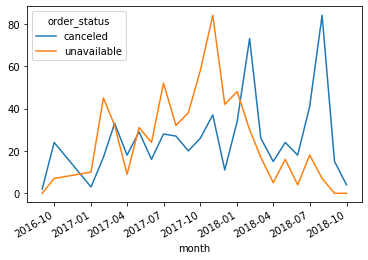

In [35]:
orders_not_del_by_month.plot()

Посмотрим на относительное количество заказов, которые были недоставлены.

In [36]:
orders_unique_id['month'] = orders_unique_id.order_purchase_timestamp.astype('datetime64[M]')

In [37]:
orders_not_del_by_month = orders_not_del_by_month\
        .merge((orders_unique_id.groupby('month').agg({'order_id':'nunique'})), left_index=True, right_index=True)

In [38]:
orders_not_del_by_month['canceled_%'] = (orders_not_del_by_month['canceled'] / 
                                         orders_not_del_by_month['order_id'])*100
orders_not_del_by_month['unavailable_%'] = (orders_not_del_by_month['unavailable'] / 
                                            orders_not_del_by_month['order_id'])*100

In [39]:
orders_not_del_by_month

,canceled,unavailable,order_id,canceled_%,unavailable_%
month,,,,,
2016-09-01,2,0,4,50.000000,0.000000
2016-10-01,24,7,324,7.407407,2.160494
2017-01-01,3,10,800,0.375000,1.250000
2017-02-01,17,45,1780,0.955056,2.528090
2017-03-01,33,32,2682,1.230425,1.193139
2017-04-01,18,9,2404,0.748752,0.374376
2017-05-01,29,31,3700,0.783784,0.837838
2017-06-01,16,24,3245,0.493066,0.739599
2017-07-01,28,52,4026,0.695479,1.291605


# Ответ на задание 2 


__По причине "canceled" в среднем в месяц не доставляется 26.041667 посылок__

__По причине "unavailable" в среднем в месяц не доставляется 25.375000 посылок__ 


# Задание 3 
По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

In [40]:
# Посмотрим еще раз на таблицу с заказами
orders_unique_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   month                          99441 non-null  datetime64[ns]
dtypes: datetime64[ns](6), object(4)
memory usage: 8.3+ MB


In [41]:
(orders_unique_id.order_approved_at - orders_unique_id.order_purchase_timestamp).describe()

count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
dtype: object

In [42]:
(orders_unique_id.order_approved_at - orders_unique_id.order_purchase_timestamp)\
    .sort_values(ascending=False).head(15)

47552   187 days 21:10:50
62293    60 days 10:51:59
4541     32 days 16:02:44
4396     32 days 13:01:41
43697    32 days 12:51:18
96251    30 days 21:26:37
55708    30 days 18:26:56
53475    28 days 04:04:12
10071    23 days 21:52:27
83143    23 days 03:53:25
88671    23 days 02:47:06
71651    16 days 20:13:44
73881    13 days 07:31:58
36672    13 days 01:47:55
14173    12 days 12:25:39
dtype: timedelta64[ns]

In [43]:
((orders_unique_id.order_approved_at - orders_unique_id.order_purchase_timestamp) > pd.Timedelta("1 days")).sum()

17419

В большом количестве случаев даты в колонках order_purchase_timestamp и order_approved_at отличаются более чем на 1 день.

__За дату совершения покупки будем брать данные из колонки order_approved_at__

In [44]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
order_items.shape

(112650, 7)

In [46]:
order_items.order_id.nunique()

98666

Создадим отдельный датафрем, содержащий 'order_id' и 'product_id' из таблицы order_items, к которому добавим информацию о дате совершения покупки из таблицы orders_unique_id

In [47]:
order_by_day_week = order_items[['order_id','product_id']]\
    .merge(orders_unique_id[['order_id','order_approved_at']], how='left', on='order_id')

In [48]:
order_by_day_week.head()

,order_id,product_id,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-04 14:10:13


In [49]:
order_by_day_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_id           112650 non-null  object        
 1   product_id         112650 non-null  object        
 2   order_approved_at  112635 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 3.4+ MB


Добавим информацию о дне недели, в который была совершена покупка

In [50]:
order_by_day_week['day_of_week'] = order_by_day_week.order_approved_at.dt.strftime('%A')

In [51]:
order_by_day_week.head()

,order_id,product_id,order_approved_at,day_of_week
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:48:30,Sunday
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-08 10:10:18,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-04 14:10:13,Saturday


In [52]:
order_by_day_week.shape

(112650, 4)

In [53]:
order_by_day_week.product_id.nunique()

32951

In [54]:
# 1.Сгруппируем даные по 'product_id','day_of_week' и посчитаем количесвто покупок в каждый день для каждого товара
# 2.Еще раз сгруппируем даные по 'product_id','day_of_week' и оставим только записи с максимальным количесвтом покупок
order_by_day_week.groupby(['product_id','day_of_week'], as_index=False).agg({'order_id':'count'})\
            .groupby(['product_id','day_of_week'], as_index=False).agg({'order_id':'max'})\
            .rename(columns={'order_id':'count_of_items'})\
            .sort_values('count_of_items', ascending=False)

,product_id,day_of_week,count_of_items
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
41077,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
...,...,...,...
23986,63ee501f72520d5ec54cef5fd3a21a20,Wednesday,1
23988,63f4d40c05db6ade462cecef857eec34,Monday,1
23990,63f4d40c05db6ade462cecef857eec34,Wednesday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


# Задание 4 

Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [55]:
orders_purchased_4 = orders_purchased[['order_id','customer_unique_id','order_approved_at']].copy()

In [56]:
orders_purchased_4.head()

,order_id,customer_unique_id,order_approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29


In [57]:
# Создадим колонку month как дату начала месяца для времени из order_approved_at
orders_purchased_4['month'] = orders_purchased_4.order_approved_at.astype('datetime64[M]')

In [58]:
orders_purchased_4.head()

,order_id,customer_unique_id,order_approved_at,month
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02-01


In [59]:
# Создадим датафрейм, в котором посчитаем количесвто покупок каждого покупателя в каждый отдельный месяц
df = orders_purchased_4.groupby(['customer_unique_id', 'month'], as_index=False).agg({'order_id':'count'})

In [60]:
df.head()

,customer_unique_id,month,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1


In [61]:
# Добавим колонку количества недель в месяце
df['week_in_month'] = df.month.dt.days_in_month / 7

In [62]:
df.head()

,customer_unique_id,month,order_id,week_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714


In [63]:
# Поделим количество покупок в месяце на количество недель в месяце и получим количество покупок в среднем в неделю (по месяцам).
df['mean_of_order'] = df['order_id'] / df['week_in_month']

In [64]:
df

,customer_unique_id,month,order_id,week_in_month,mean_of_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714,0.233333
...,...,...,...,...,...
96841,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,4.285714,0.233333
96842,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,4.428571,0.225806
96843,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,4.000000,0.250000
96844,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,4.428571,0.225806


# Задание 5 

__Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. (10 баллов)__

На вход функции для постройки когортного анализа необходимо будет подавать подготовленные данные.

Необходим датафрейм, в котогом будет колонки:
- customer_unique_id — уникальный идентификатор пользователя
- order_approved_at —  время подтверждения оплаты заказаза

Такой датафрейм мы получали ранее получали ранее в первом задании

In [65]:
# Функция считает относительные значения
def cohort_analysis_relative(df):
    # Создадим колонку month как дату начала месяца для времени из order_purchase_timestamp
    df['month'] = df['order_approved_at'].astype('datetime64[M]')
    
    # Создаем колонку cohort_month, где будет храниться год и месяц первой покупки, по данной колонке будем групировать когорты
    df['cohort_month'] = df.groupby('customer_unique_id')['month'].transform('min')
    
    # Создадим колонку cohort_index, в которой будем указано число - через сколько месяцев 
    # от первой покупки совершена очередная покупка пользователем
    df['cohort_index']=(df['month'].dt.year - df['cohort_month'].dt.year)*12 + df['month'].dt.month - df['cohort_month'].dt.month
    df1 = df.groupby(['cohort_month','cohort_index'])\
    .customer_unique_id.apply(pd.Series.nunique).reset_index()\
    .pivot(index='cohort_month', columns='cohort_index', values='customer_unique_id')
    
    df1 = df1.divide(df1[0],axis=0) #считаем повторных клиентовы от размера когорты
    return df1

In [66]:
# Функция считает абсолютные значения
def cohort_analysis_absolute(df):
    # Создадим колонку month как дату начала месяца для времени из order_purchase_timestamp
    df['month'] = df['order_approved_at'].astype('datetime64[M]')
    
    # Создаем колонку cohort_month, где будет храниться год и месяц первой покупки, по данной колонке будем групировать когорты
    df['cohort_month'] = df.groupby('customer_unique_id')['month'].transform('min')
    
    # Создадим колонку cohort_index, в которой будем указано число - через сколько месяцев 
    # от первой покупки совершена очередная покупка пользователем
    df['cohort_index']=(df['month'].dt.year - df['cohort_month'].dt.year)*12 + df['month'].dt.month - df['cohort_month'].dt.month
    df1 = df.groupby(['cohort_month','cohort_index'])\
    .customer_unique_id.apply(pd.Series.nunique).reset_index()\
    .pivot(index='cohort_month', columns='cohort_index', values='customer_unique_id')
    
    return df1

In [67]:
df1 = cohort_analysis_relative(orders_purchased)

In [68]:
df1

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.003436,NaN,NaN,0.003436,NaN,0.003436,NaN,0.003436,NaN,0.003436,NaN,0.003436,0.006873,0.006873
2016-12-01,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,NaN,0.002793,0.002793,0.006983,0.004190,0.001397,0.001397,0.002793,0.004190,0.001397,NaN
2017-02-01,1.0,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195,0.002987,0.001195,0.001792,0.001195,0.000597,0.000597,0.002389,NaN,NaN
2017-03-01,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,0.003876,0.001163,0.002326,0.001163,0.001550,0.002326,0.000775,0.001550,NaN,NaN
2017-04-01,1.0,0.006084,0.002173,0.001738,0.002608,0.002608,0.003477,0.002608,0.003477,0.001738,0.002173,0.000869,0.000869,0.000435,0.000869,0.000869,0.001304,NaN,NaN,NaN
2017-05-01,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,0.002540,0.002540,0.002822,0.003387,0.001976,0.000564,0.001976,0.002258,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537,0.002251,0.001286,0.002251,0.003215,0.003537,0.001608,0.001286,0.001929,NaN,NaN,NaN,NaN,NaN


In [69]:
# нужно дропнуть записи из таблицы за 2016 год?

In [70]:
(df1.style
            .background_gradient(cmap='cividis', axis=0)  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту

cohort_index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,19.000000,20.000000
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,100.00%,,,,,,,,,,,,,,,,,,,
2016-10-01 00:00:00,100.00%,,,,,,0.34%,,,0.34%,,0.34%,,0.34%,,0.34%,,0.34%,0.69%,0.69%
2016-12-01 00:00:00,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,0.56%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.28%,0.28%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.14%,
2017-02-01 00:00:00,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,,
2017-03-01 00:00:00,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,0.39%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,,
2017-04-01 00:00:00,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.13%,,,
2017-05-01 00:00:00,100.00%,0.54%,0.48%,0.40%,0.31%,0.34%,0.42%,0.14%,0.25%,0.25%,0.28%,0.34%,0.20%,0.06%,0.20%,0.23%,,,,
2017-06-01 00:00:00,100.00%,0.45%,0.35%,0.39%,0.26%,0.35%,0.35%,0.23%,0.13%,0.23%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,,


In [71]:
(df1.iloc[3:,].style
            .background_gradient(cmap='cividis', axis=0)  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту

/opt/homebrew/Caskroom/miniforge/base/envs/py_3.10.5/lib/python3.10/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/homebrew/Caskroom/miniforge/base/envs/py_3.10.5/lib/python3.10/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


cohort_index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,19.000000,20.000000
cohort_month,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,0.56%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.28%,0.28%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.14%,
2017-02-01 00:00:00,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,,
2017-03-01 00:00:00,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,0.39%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,,
2017-04-01 00:00:00,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.13%,,,
2017-05-01 00:00:00,100.00%,0.54%,0.48%,0.40%,0.31%,0.34%,0.42%,0.14%,0.25%,0.25%,0.28%,0.34%,0.20%,0.06%,0.20%,0.23%,,,,
2017-06-01 00:00:00,100.00%,0.45%,0.35%,0.39%,0.26%,0.35%,0.35%,0.23%,0.13%,0.23%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,,
2017-07-01 00:00:00,100.00%,0.53%,0.32%,0.19%,0.34%,0.19%,0.32%,0.11%,0.19%,0.24%,0.21%,0.29%,0.13%,0.26%,,,,,,
2017-08-01 00:00:00,100.00%,0.67%,0.36%,0.26%,0.39%,0.53%,0.26%,0.26%,0.12%,0.17%,0.24%,0.17%,0.14%,,,,,,,
2017-09-01 00:00:00,100.00%,0.66%,0.49%,0.34%,0.41%,0.27%,0.22%,0.22%,0.32%,0.17%,0.27%,0.07%,,,,,,,,


In [72]:
cohort_analysis_absolute(orders_purchased)

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,291.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03-01,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04-01,2301.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05-01,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06-01,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [73]:
df1[3.0].idxmax()

Timestamp('2017-05-01 00:00:00')

 __Когорта '2017-05-01' имеет самый высокий retention на 3-й месяц__

# Задание 6

__Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M). Описание подхода можно найти тут. (35 баллов)__

Создадим таблицу для начала анализа, в которой нам нужны все совершенные покупки с уникальным customer_unique_id клиента, временем совершения покупки, и суммой заказа

In [74]:
data_for_RFM = orders_purchased[['order_id','customer_unique_id','order_approved_at']] \
        .merge((order_items.groupby('order_id', as_index=False).agg({'price':'sum'})))

In [75]:
data_for_RFM.order_approved_at = data_for_RFM.order_approved_at.astype('datetime64[D]')

In [76]:
data_for_RFM.head()

,order_id,customer_unique_id,order_approved_at,price
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-26,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13,19.90


In [77]:
#Теперь на основе данной таблицы расчитаем 'recency' 'frequency' 'monetary'

In [79]:
# для каждого 'customer_unique_id' находим дату последней покупки, 
# количество всех покупок и сумму потраченную на покупки
RFM = data_for_RFM.groupby('customer_unique_id', as_index=False)\
        .agg({'order_approved_at':'max', 'order_id':'count', 'price':'sum' })\
        .rename(columns={'order_id':'frequency','price':'monetary'})

In [80]:
RFM

,customer_unique_id,order_approved_at,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00
...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00
94979,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89
94980,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90
94981,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00


In [81]:
RFM.isna().sum()

customer_unique_id     0
order_approved_at     13
frequency              0
monetary               0
dtype: int64

In [82]:
#  в переменную present_day сохраним день, когда была совершена последняя покупка. 
# Этот день будем считать как текущий.
present_day = data_for_RFM.order_approved_at.max()

In [83]:
present_day

Timestamp('2018-09-03 00:00:00')

In [84]:
# посчитаем разницу в днях между текущей датой и совершенной покупкой
RFM['recency'] = (present_day - RFM.order_approved_at).dt.days

In [85]:
RFM

,customer_unique_id,order_approved_at,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,116.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,119.0
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,542.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,326.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,293.0
...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00,452.0
94979,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,267.0
94980,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90,573.0
94981,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,115.00,124.0


In [86]:
RFM.recency.max()

718.0

In [87]:
RFM.recency.describe()

count    94970.000000
mean       242.775424
std        152.949932
min          0.000000
25%        119.000000
50%        224.000000
75%        352.000000
max        718.000000
Name: recency, dtype: float64

Клиентов, совершивших покупку более 365 дней назад, будем считать потерянными.

Присваиваем значениям R F M 

In [88]:
RFM_stale = RFM[RFM.recency > 365]

In [89]:
RFM_stale['R'] = 0
RFM_stale['F'] = 0
RFM_stale['M'] = 0

/var/folders/x_/y14h53n12v5_68cqf_s18k780000gn/T/ipykernel_890/2156827515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_stale['R'] = 0
/var/folders/x_/y14h53n12v5_68cqf_s18k780000gn/T/ipykernel_890/2156827515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_stale['F'] = 0
/var/folders/x_/y14h53n12v5_68cqf_s18k780000gn/T/ipykernel_890/2156827515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [90]:
RFM_stale

,customer_unique_id,order_approved_at,frequency,monetary,recency,R,F,M
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,542.0,0,0,0
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04,1,135.00,548.0,0,0,0
10,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18,1,13.90,412.0,0,0,0
14,000a5ad9c4601d2bbdd9ed765d5213b3,2017-08-11,1,76.99,388.0,0,0,0
18,000de6019bb59f34c099a907c151d855,2017-08-17,1,229.80,382.0,0,0,0
...,...,...,...,...,...,...,...,...
94964,fff1afc79f6b5db1e235a4a6c30ceda7,2017-08-30,1,34.99,369.0,0,0,0
94968,fff3a9369e4b7102fab406a334a678c3,2017-08-11,1,84.90,388.0,0,0,0
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,1570.00,452.0,0,0,0
94980,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,89.90,573.0,0,0,0


In [92]:
#  Дальше значения R, F и M считаем для "свежих" покупателей 
RFM_active = RFM[RFM.recency <= 365]

In [93]:
RFM_active

,customer_unique_id,order_approved_at,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,116.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,119.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,326.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,293.0
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,1,154.00,151.0
...,...,...,...,...,...
94975,fffb09418989a0dbff854a28163e47c6,2017-12-19,1,58.00,258.0
94976,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27,1,149.00,250.0
94977,fffcc512b7dfecaffd80f13614af1d16,2018-04-11,1,688.00,145.0
94979,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,267.0


По колонке recency разделим пользователей на три примерно равные по количеству группы с помощью функции pd.qcut(). Присвоим значения группам от 1 до 3, где 3 - покупка совершена совсем недавно.

По колонке monetary разделим пользователей на три примерно равные по количеству группы с помощью функции pd.qcut(). Присвоим значения группам от 1 до 3, где 3 - большая стоимость покупок.

In [94]:
RFM_active['R'] = 3 - pd.qcut(RFM_active.recency,3,labels=False)

/var/folders/x_/y14h53n12v5_68cqf_s18k780000gn/T/ipykernel_890/2427058647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_active['R'] = 3 - pd.qcut(RFM_active.recency,3,labels=False)


In [95]:
RFM_active['M'] = pd.qcut(RFM_active.monetary,3, labels=False) + 1

/var/folders/x_/y14h53n12v5_68cqf_s18k780000gn/T/ipykernel_890/329202752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_active['M'] = pd.qcut(RFM_active.monetary,3, labels=False) + 1


In [104]:
RFM_active.frequency.value_counts()

1     70798
2      2144
3       154
4        26
5         9
6         4
7         3
9         1
16        1
Name: frequency, dtype: int64

С помощью функции pd.qcut() поделить колонку frequency на три равные по количеству группы не получится, так как основное количество пользователей совершило только одну покупку.
Поэтому поделим на группы руками.

Пользователям, совершившим одну покупку, будет присвоен ранг 1.

Пользователям, совершившим две покупки, будет присвоен ранг 2.

Остальные пользователи получат ранг 3.

In [105]:
def freq(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    return 3

In [106]:
RFM_active['F'] = RFM_active.frequency.apply(freq)

/var/folders/x_/y14h53n12v5_68cqf_s18k780000gn/T/ipykernel_890/379704309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_active['F'] = RFM_active.frequency.apply(freq)


In [107]:
RFM_active

,customer_unique_id,order_approved_at,frequency,monetary,recency,R,M,F
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,116.0,3,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,119.0,3,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,326.0,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,293.0,1,3,1
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,1,154.00,151.0,2,3,1
...,...,...,...,...,...,...,...,...
94975,fffb09418989a0dbff854a28163e47c6,2017-12-19,1,58.00,258.0,1,1,1
94976,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27,1,149.00,250.0,1,3,1
94977,fffcc512b7dfecaffd80f13614af1d16,2018-04-11,1,688.00,145.0,2,3,1
94979,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,64.89,267.0,1,2,1


In [108]:
RFM_active.dtypes

customer_unique_id            object
order_approved_at     datetime64[ns]
frequency                      int64
monetary                     float64
recency                      float64
R                              int64
M                              int64
F                              int64
dtype: object

Выведем среднее значение метрик для каждого кластера

In [109]:
RFM_active.groupby('R').recency.mean()

R
1    290.797015
2    175.604918
3     63.826119
Name: recency, dtype: float64

In [110]:
RFM_active.groupby('M').monetary.mean()

M
1     35.317927
2     90.749319
3    302.297481
Name: monetary, dtype: float64

In [111]:
RFM_active.groupby('F').frequency.mean()

F
1    1.000000
2    2.000000
3    3.439394
Name: frequency, dtype: float64